# Analyzing the time distribution of ratings


**Hypothesis** : Calibration tries to approximate the item genre distribution between hsitory and recommendation through a frequentist approach. However, this does not take into account how old is a movie rating: For example, a user that saw 100 movies through 4 years, watching 25 pear year where the first 25 are action movies, the second 25 are comedy movies, the third 25 are romance movies, and the final 25 are horror movies. Naturally, a user does not have a clear cut viewing history like this, but this example illustrates the point that a user interest changes throughout time. 


Calibrated recommendations can close the gap between the user preference and the recommendation list. However, the classical approach does not model scenarios where the user interest changes throughout time, something that sequential recommender models are capable of modelling through short term tendencies,whereas classical recommender systems - collaborative filtering, namely - are not. 

In this notebook, we investigate how the viewing history changes throughout time: are ratings uniformly distributed through time? Whats the average viewing history time delta?



We'll be analyzing the median distance between the first and last movie for each user.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Analyzing the rating distribution in Movielens

In [8]:
base = pd.read_csv("ml20m_filtered_300k_sample.csv")[["userId", "movieId", "genres", "timestamp", "rating"]]

In [9]:
base

,userId,movieId,genres,timestamp,rating
0,136670,1,Adventure|Animation|Children|Comedy|Fantasy,862652804,4.0
1,83076,1,Adventure|Animation|Children|Comedy|Fantasy,1234146518,4.5
2,42831,1,Adventure|Animation|Children|Comedy|Fantasy,979348139,4.0
3,66181,1,Adventure|Animation|Children|Comedy|Fantasy,939675916,5.0
4,2758,1,Adventure|Animation|Children|Comedy|Fantasy,833215908,4.0
...,...,...,...,...,...
299995,84136,119145,Action|Adventure|Comedy|Crime,1424865002,4.5
299996,24646,125916,Drama,1424274393,4.0
299997,69470,127098,Comedy,1422828040,4.5
299998,136684,127098,Comedy,1424133121,4.5


In [10]:
len(base.userId.unique())

91716

In [11]:
len(base.movieId.unique())

9071

In [12]:
time_df = base[["userId", "timestamp"]]

In [13]:
time_df

,userId,timestamp
0,136670,862652804
1,83076,1234146518
2,42831,979348139
3,66181,939675916
4,2758,833215908
...,...,...
299995,84136,1424865002
299996,24646,1424274393
299997,69470,1422828040
299998,136684,1424133121


In [17]:
most_recent_df = time_df.groupby("userId")["timestamp"].max().reset_index()
most_recent_df.columns = ['userId', 'most_recent_timestamp']


In [18]:
most_recent_df

,userId,most_recent_timestamp
0,1,1112486138
1,3,944918310
2,5,851617728
3,7,1011209096
4,8,833982790
...,...,...
91711,138486,1207075178
91712,138487,965499756
91713,138490,975543932
91714,138491,1236130647


In [24]:
df = time_df.merge(most_recent_df, on="userId")
df['delta'] = df['most_recent_timestamp'] - df['timestamp']
df['delta_hours'] = df['delta'] / 3600
df['delta_days'] = df['delta'] / 86400

In [25]:
df

,userId,timestamp,most_recent_timestamp,delta,delta_hours,delta_days
0,136670,862652804,862653089,285,0.079167,0.003299
1,83076,1234146518,1234150066,3548,0.985556,0.041065
2,42831,979348139,981161293,1813154,503.653889,20.985579
3,66181,939675916,1231662789,291986873,81107.464722,3379.477697
4,2758,833215908,833215908,0,0.000000,0.000000
...,...,...,...,...,...,...
299995,84136,1424865002,1424865002,0,0.000000,0.000000
299996,24646,1424274393,1424274393,0,0.000000,0.000000
299997,69470,1422828040,1422828040,0,0.000000,0.000000
299998,136684,1424133121,1426972494,2839373,788.714722,32.863113


In [27]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached matplotlib-3.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 9.2 MB/s eta 0:00:000m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.2 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 KB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 12.5 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 KB 13.0 MB/s eta 0:00:00


In [33]:
df.delta_days.describe()

count    300000.000000
mean        316.969989
std         800.532613
min           0.000000
25%           0.000000
50%           0.019294
75%         107.550119
max        6249.315903
Name: delta_days, dtype: float64

In [34]:
df.delta_hours.describe()

count    300000.000000
mean       7607.279726
std       19212.782703
min           0.000000
25%           0.000000
50%           0.463056
75%        2581.202847
max      149983.581667
Name: delta_hours, dtype: float64

Notice that most users have probably watched a single movie, given that almost 50% of users have basically a 0 days difference between the first and last movie they saw.

Let's confirm this by looking at the number of movies watched per user

In [76]:
num_movies = df.groupby("userId").size().reset_index().rename(columns={0: "num_movies"})

In [93]:
num_movies["num_movies"].describe()

count    91716.000000
mean         3.270967
std          3.681225
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        105.000000
Name: num_movies, dtype: float64

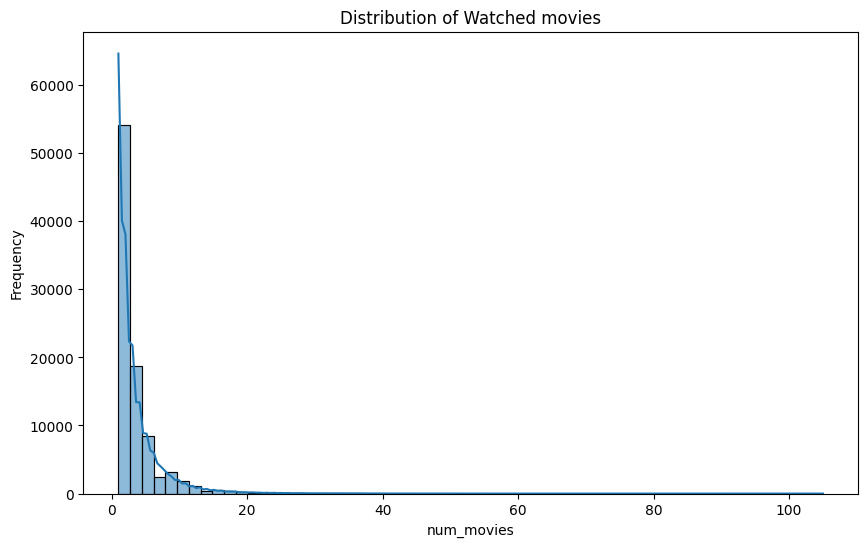

In [79]:

plt.figure(figsize=(10, 6))
sns.histplot(num_movies['num_movies'], bins=60, kde=True)
plt.xlabel('num_movies')
plt.ylabel('Frequency')
plt.title('Distribution of Watched movies')
plt.show()

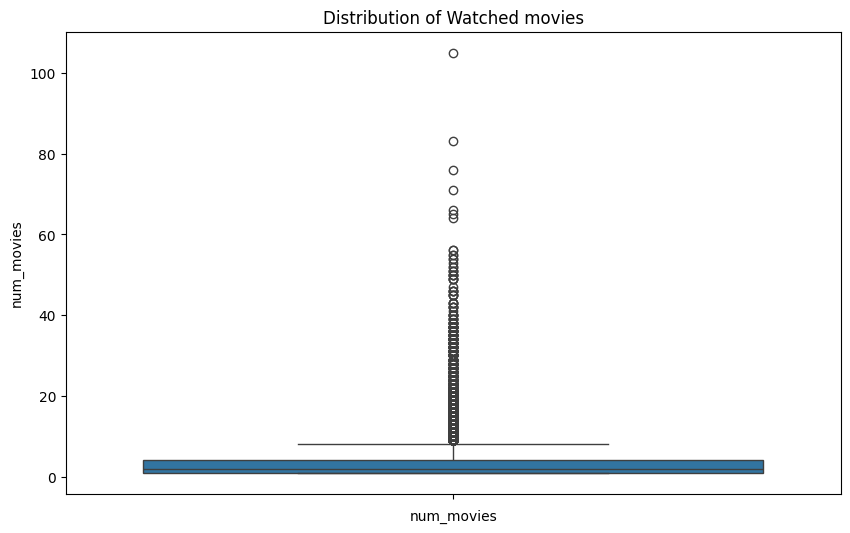

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(num_movies['num_movies'])
plt.xlabel('num_movies')
plt.title('Distribution of Watched movies')
plt.show()

Over 75% of users have seen at most 4 movies. This can skew our time delta plots, as we can see in the following graph (For rating delta in days and hours). Users that have 

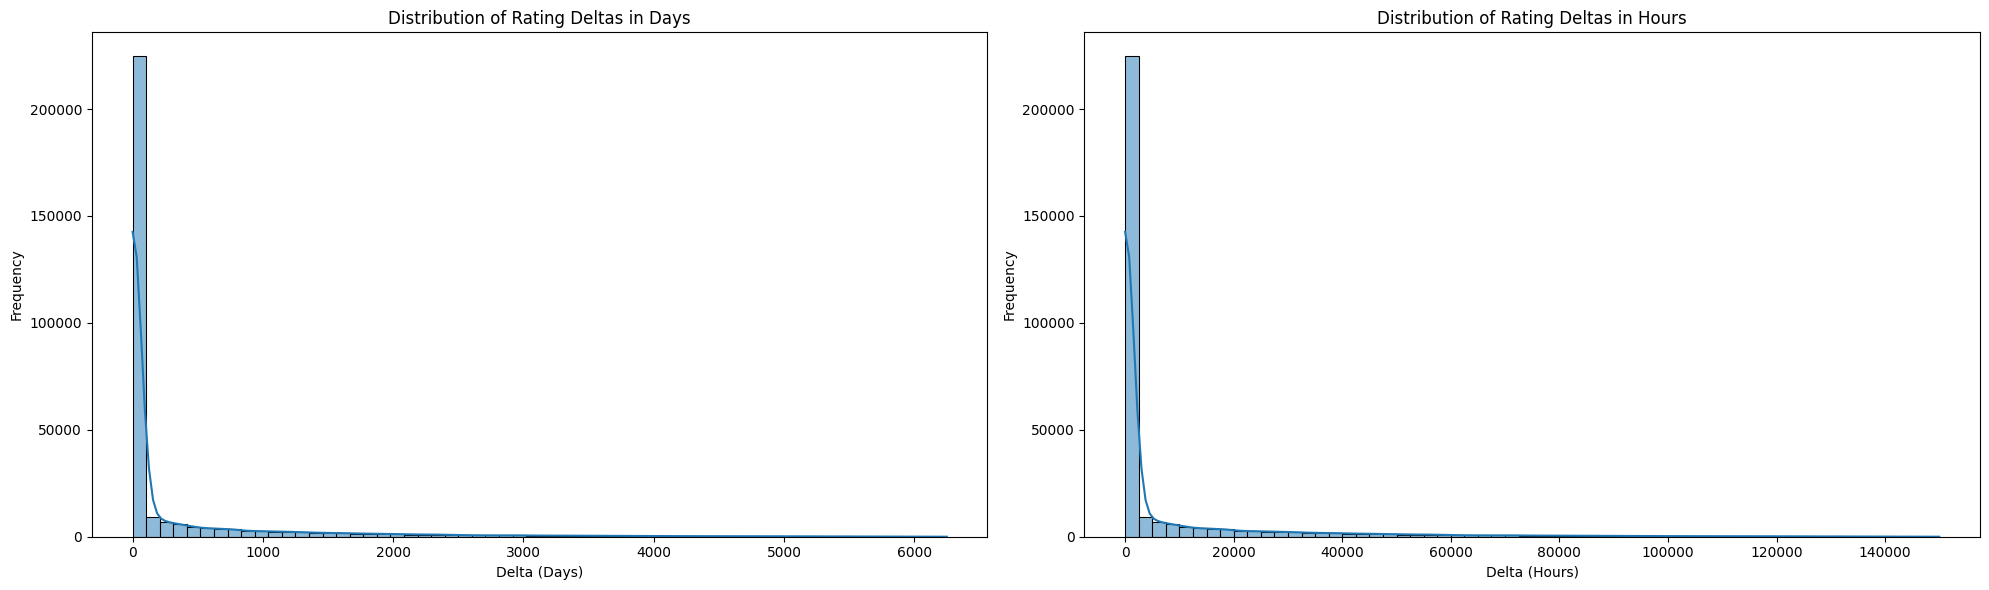

In [95]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))  # Create a 1x2 grid of subplots

sns.histplot(df['delta_days'], bins=60, kde=True, ax=ax[0])  # Use ax[0] for the first plot
ax[0].set_xlabel('Delta (Days)')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Distribution of Rating Deltas in Days')

sns.histplot(df['delta_hours'], bins=60, kde=True, ax=ax[1])  # Use ax[0] for the first plot
ax[1].set_xlabel('Delta (Hours)')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Distribution of Rating Deltas in Hours')


plt.tight_layout()  # Adjust spacing between plots
plt.show()


Now lets filter filter out inactive users. We'll assume a user is active if it has seen more than 10 movies. 

In [108]:
active_users = [user.item() for user in num_movies[num_movies["num_movies"] >= 10].userId.unique()]

In [110]:
active_users = df.userId.isin(val)

In [111]:
df_active = df[active_users]

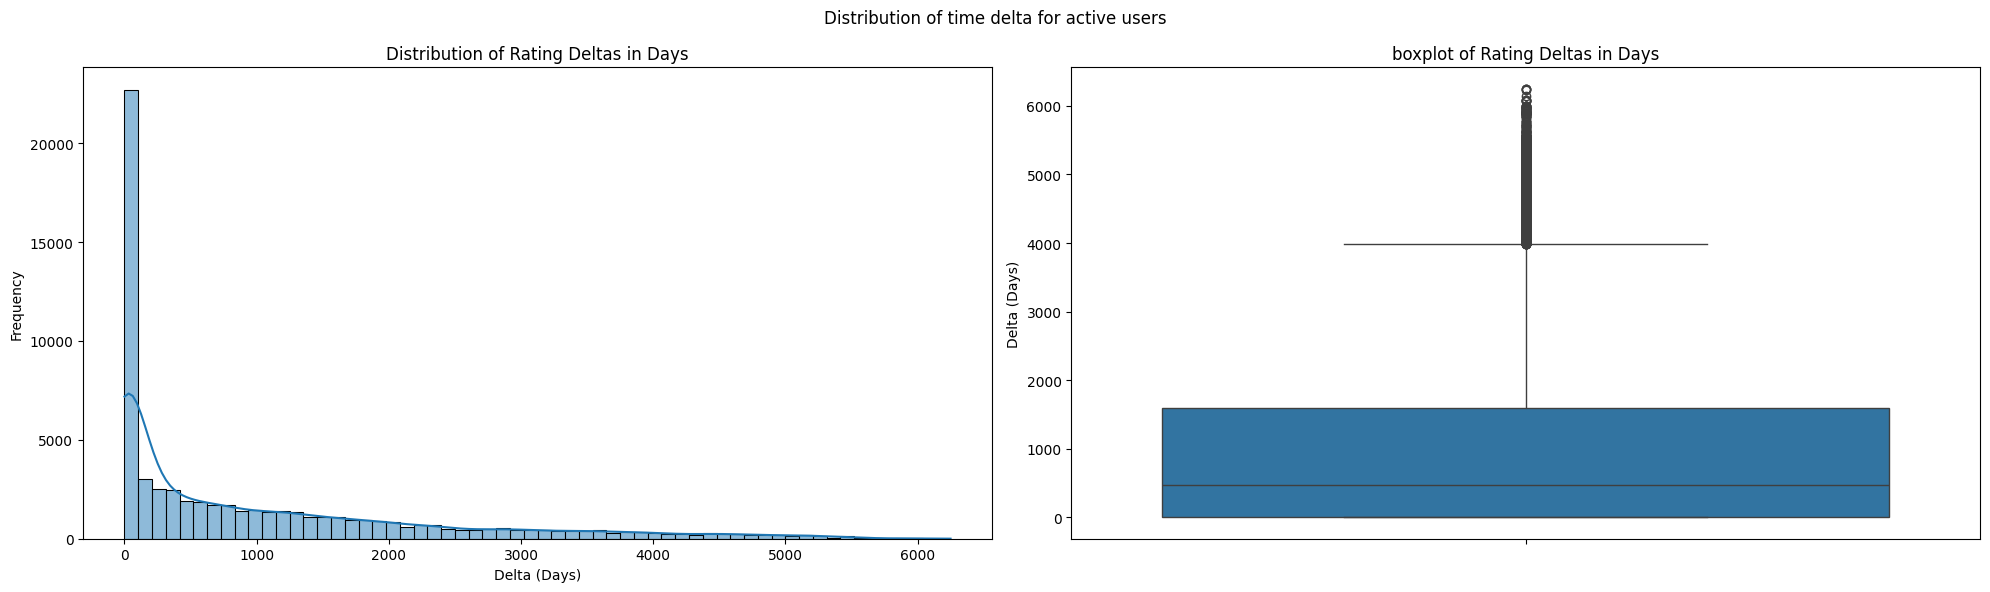

In [126]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))  # Create a 1x2 grid of subplots

sns.histplot(df_active['delta_days'], bins=60, kde=True, ax=ax[0])  # Use ax[0] for the first plot
ax[0].set_xlabel('Delta (Days)')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Distribution of Rating Deltas in Days')

sns.boxplot(y=df_active['delta_days'], ax=ax[1])
ax[1].set_xlabel('')
ax[1].set_ylabel('Delta (Days)')
ax[1].set_title('boxplot of Rating Deltas in Days')


plt.suptitle("Distribution of time delta for active users")
plt.tight_layout()  # Adjust spacing between plots
plt.show()


Now this distribution looks more well behaved. The boxplot looks nicer as well

In [114]:
Q1 = df_active.quantile(0.25)
Q3 = df_active.quantile(0.75)
IQR = Q3 - Q1
upper_whisker = Q3 + 1.5 * IQR


In [122]:
df_active['delta_days'].describe()

count    63166.000000
mean      1025.506969
std       1299.955559
min          0.000000
25%          5.020900
50%        466.509248
75%       1599.199821
max       6249.315903
Name: delta_days, dtype: float64

In [118]:
upper_whisker.delta_days.item() / 365

10.932789593639017

Notice that 50% of our data is comprised of users that have a history with movies ranging from 1 year to 3 years. This can be an indicative that calibration alone is not enough and that we should explore alternatives that take into account how far away was the movie seen.

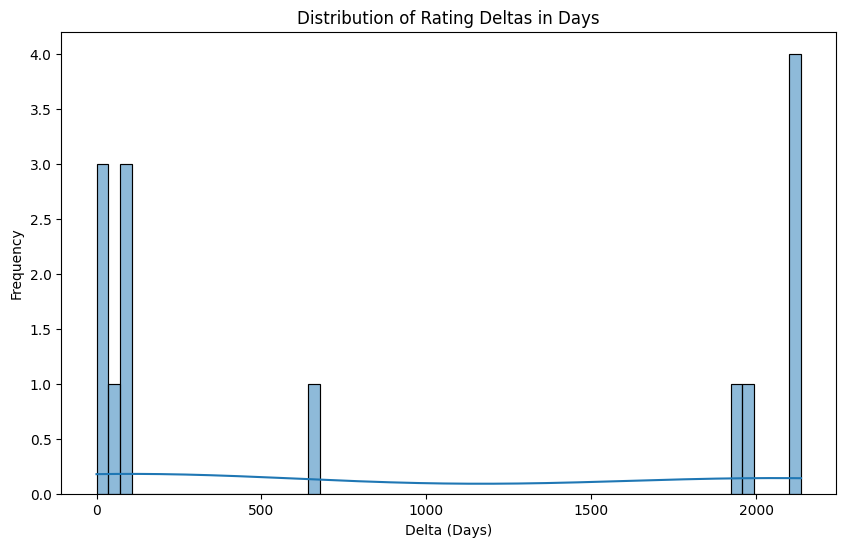

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(b[b['userId'] == 38160]['delta_days'], bins=60, kde=True)
plt.xlabel('Delta (Days)')
plt.ylabel('Frequency')
plt.title('Distribution of Rating Deltas in Days')
plt.show()

TODO: scatterplot with genres for timedelta

## Analyzing data from kuairec dataset

In [23]:
categories = pd.read_csv("KuaiRec 2.0/data/item_categories.csv")

In [24]:
categories

,video_id,feat
0,0,[8]
1,1,"[27, 9]"
2,2,[9]
3,3,[26]
4,4,[5]
...,...,...
10723,10723,[11]
10724,10724,[2]
10725,10725,[15]
10726,10726,[19]


In [36]:
base = pd.read_csv("datasets/kuairec_filtered.csv")[["user_id", "video_id", "timestamp"]]

In [6]:
base

,user_id,video_id,timestamp
0,14,148,1.593898e+09
1,14,183,1.593898e+09
2,14,3649,1.593898e+09
3,14,5262,1.593898e+09
4,14,8234,1.593899e+09
...,...,...,...
4494573,7162,9177,1.598962e+09
4494574,7162,4987,1.599029e+09
4494575,7162,7988,1.599094e+09
4494576,7162,6533,1.599231e+09


In [34]:
time_df = base[["user_id", "timestamp"]]

In [11]:
most_recent_df = time_df.groupby("user_id")["timestamp"].max().reset_index()
most_recent_df.columns = ['user_id', 'most_recent_timestamp']
df = time_df.merge(most_recent_df, on="user_id")
df['delta'] = df['most_recent_timestamp'] - df['timestamp']
df['delta_days'] = df['delta'] / 86400

In [12]:
df

,user_id,timestamp,most_recent_timestamp,delta,delta_days
0,14,1.593898e+09,1.599277e+09,5379214.515,62.259427
1,14,1.593898e+09,1.599277e+09,5379202.836,62.259292
2,14,1.593898e+09,1.599277e+09,5379133.414,62.258489
3,14,1.593898e+09,1.599277e+09,5379039.608,62.257403
4,14,1.593899e+09,1.599277e+09,5378739.434,62.253929
...,...,...,...,...,...
4494573,7162,1.598962e+09,1.599237e+09,275133.170,3.184412
4494574,7162,1.599029e+09,1.599237e+09,208037.812,2.407845
4494575,7162,1.599094e+09,1.599237e+09,143227.680,1.657728
4494576,7162,1.599231e+09,1.599237e+09,5737.133,0.066402


In [13]:
df.delta_days.describe()

count    4.494578e+06
mean     3.476125e+01
std      1.453281e+01
min      0.000000e+00
25%      2.448302e+01
50%      3.499996e+01
75%      4.675184e+01
max      6.299424e+01
Name: delta_days, dtype: float64

Apparently users are more active in this dataset: the max distance between videos watched is 60 days and the median is 30 days.

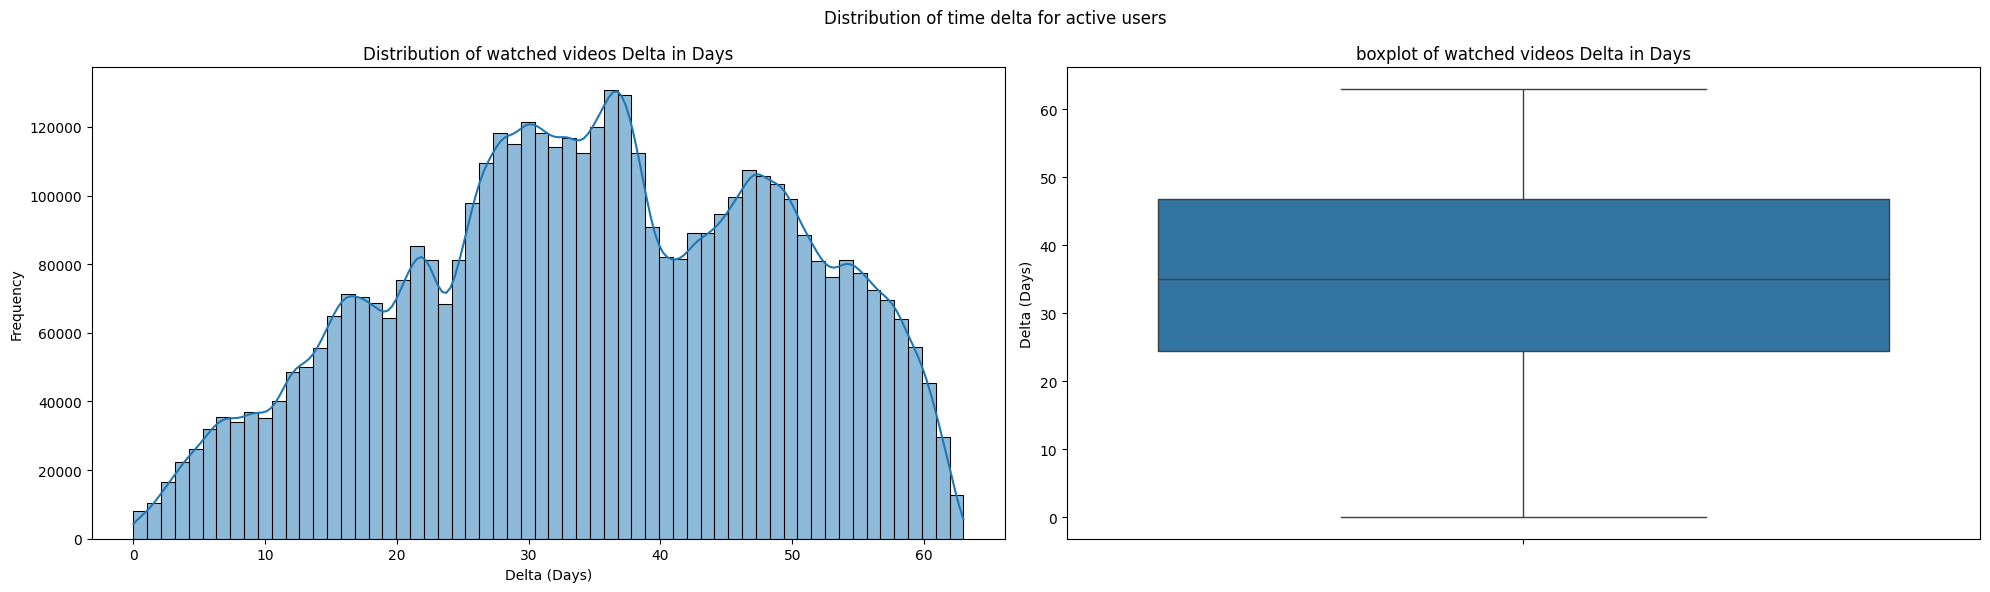

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))  # Create a 1x2 grid of subplots

sns.histplot(df['delta_days'], bins=60, kde=True, ax=ax[0])  # Use ax[0] for the first plot
ax[0].set_xlabel('Delta (Days)')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Distribution of watched videos Delta in Days')

sns.boxplot(y=df['delta_days'], ax=ax[1])
ax[1].set_xlabel('')
ax[1].set_ylabel('Delta (Days)')
ax[1].set_title('boxplot of watched videos Delta in Days')


plt.suptitle("Distribution of time delta")
plt.tight_layout()  # Adjust spacing between plots
plt.show()


Because users are very active in this platforms, it might be interesting to look at it in hours maybe, This tells that users are very active in this platform. 

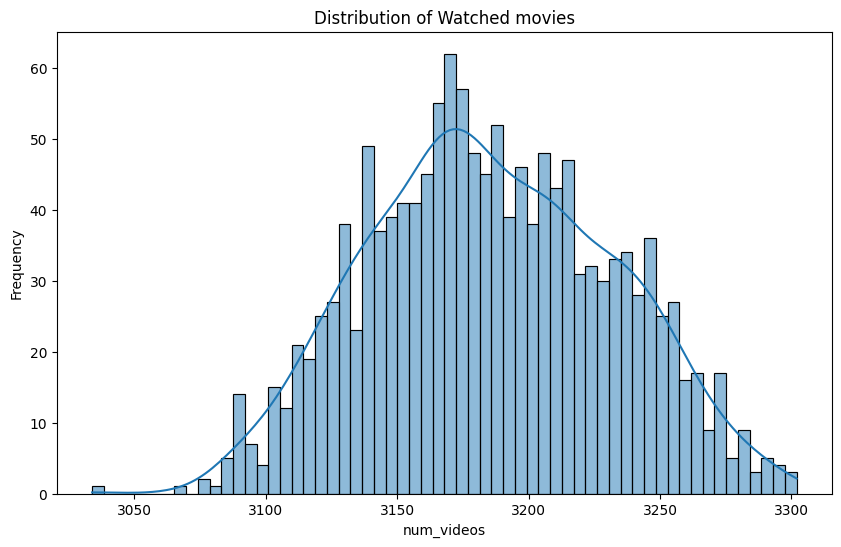

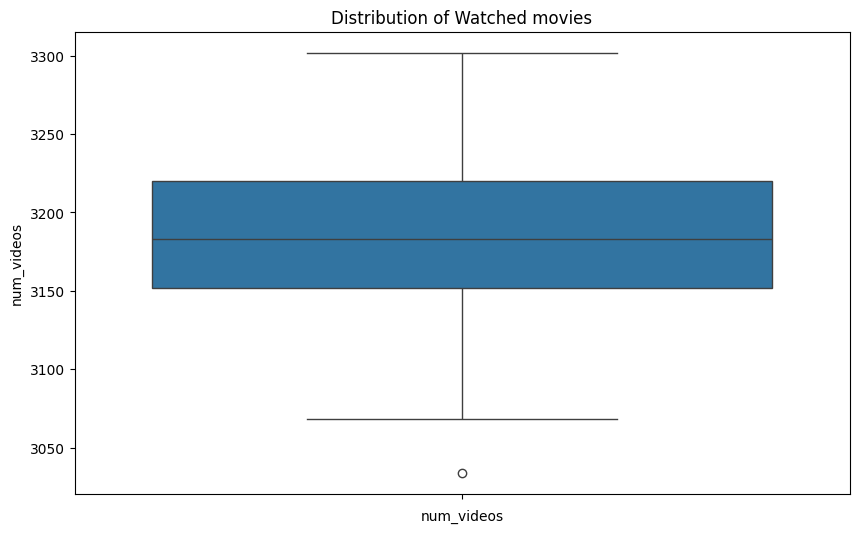

In [17]:
num_videos = df.groupby("user_id").size().reset_index().rename(columns={0: "num_videos"})

num_videos["num_videos"].describe()


plt.figure(figsize=(10, 6))
sns.histplot(num_videos['num_videos'], bins=60, kde=True)
plt.xlabel('num_videos')
plt.ylabel('Frequency')
plt.title('Distribution of Watched movies')
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(num_videos['num_videos'])
plt.xlabel('num_videos')
plt.title('Distribution of Watched movies')
plt.show()

Because this platform is based on a tiktok-like platform, the potential effect of temporal calibration might be more well observed here than on the movielens dataset.

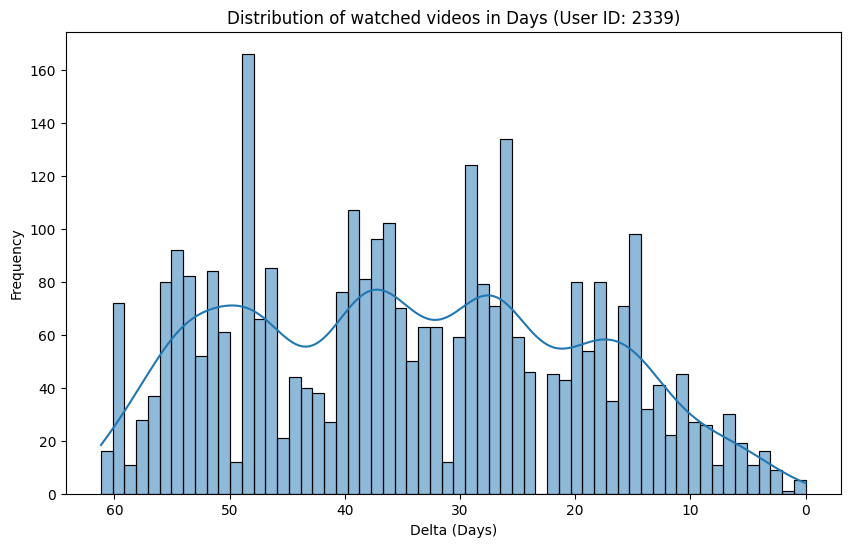

In [22]:

random_user_id = df['user_id'].sample(n=1).iloc[0]

plt.figure(figsize=(10, 6))
sns.histplot(df[df['user_id'] == random_user_id]['delta_days'], bins=60, kde=True)
plt.xlabel('Delta (Days)')
plt.ylabel('Frequency')
plt.title(f'Distribution of watched videos in Days (User ID: {random_user_id})')

plt.gca().invert_xaxis()

In [32]:
df

,user_id,timestamp,most_recent_timestamp,delta,delta_days
0,14,1.593898e+09,1.599277e+09,5379214.515,62.259427
1,14,1.593898e+09,1.599277e+09,5379202.836,62.259292
2,14,1.593898e+09,1.599277e+09,5379133.414,62.258489
3,14,1.593898e+09,1.599277e+09,5379039.608,62.257403
4,14,1.593899e+09,1.599277e+09,5378739.434,62.253929
...,...,...,...,...,...
4494573,7162,1.598962e+09,1.599237e+09,275133.170,3.184412
4494574,7162,1.599029e+09,1.599237e+09,208037.812,2.407845
4494575,7162,1.599094e+09,1.599237e+09,143227.680,1.657728
4494576,7162,1.599231e+09,1.599237e+09,5737.133,0.066402


In [30]:
with_genres

,user_id,video_id,timestamp,feat
0,14,148,1.593898e+09,"[11, 28, 19]"
1,14,183,1.593898e+09,[28]
2,14,3649,1.593898e+09,[9]
3,14,5262,1.593898e+09,[25]
4,14,8234,1.593899e+09,[6]
...,...,...,...,...
4494573,7162,9177,1.598962e+09,[16]
4494574,7162,4987,1.599029e+09,[28]
4494575,7162,7988,1.599094e+09,[16]
4494576,7162,6533,1.599231e+09,[28]


In [38]:
with_genres

,user_id,video_id,timestamp,feat
0,14,148,1.593898e+09,"[11, 28, 19]"
1,14,183,1.593898e+09,[28]
2,14,3649,1.593898e+09,[9]
3,14,5262,1.593898e+09,[25]
4,14,8234,1.593899e+09,[6]
...,...,...,...,...
4494573,7162,9177,1.598962e+09,[16]
4494574,7162,4987,1.599029e+09,[28]
4494575,7162,7988,1.599094e+09,[16]
4494576,7162,6533,1.599231e+09,[28]


In [42]:
most_recent_df = time_df.groupby("user_id")["timestamp"].max().reset_index()
most_recent_df.columns = ['user_id', 'most_recent_timestamp']
df = with_genres.merge(most_recent_df, on="user_id")
df['delta'] = df['most_recent_timestamp'] - df['timestamp']
df['delta_days'] = df['delta'] / 86400

In [43]:
df

,user_id,video_id,timestamp,feat,most_recent_timestamp,delta,delta_days
0,14,148,1.593898e+09,"[11, 28, 19]",1.599277e+09,5379214.515,62.259427
1,14,183,1.593898e+09,[28],1.599277e+09,5379202.836,62.259292
2,14,3649,1.593898e+09,[9],1.599277e+09,5379133.414,62.258489
3,14,5262,1.593898e+09,[25],1.599277e+09,5379039.608,62.257403
4,14,8234,1.593899e+09,[6],1.599277e+09,5378739.434,62.253929
...,...,...,...,...,...,...,...
4494573,7162,9177,1.598962e+09,[16],1.599237e+09,275133.170,3.184412
4494574,7162,4987,1.599029e+09,[28],1.599237e+09,208037.812,2.407845
4494575,7162,7988,1.599094e+09,[16],1.599237e+09,143227.680,1.657728
4494576,7162,6533,1.599231e+09,[28],1.599237e+09,5737.133,0.066402


In [28]:
with_genres

,user_id,video_id,timestamp,feat
0,14,148,1.593898e+09,"[11, 28, 19]"
1,14,183,1.593898e+09,[28]
2,14,3649,1.593898e+09,[9]
3,14,5262,1.593898e+09,[25]
4,14,8234,1.593899e+09,[6]
...,...,...,...,...
4494573,7162,9177,1.598962e+09,[16]
4494574,7162,4987,1.599029e+09,[28]
4494575,7162,7988,1.599094e+09,[16]
4494576,7162,6533,1.599231e+09,[28]


In [82]:
import numpy as np

In [81]:
df

,userId,timestamp,most_recent_timestamp,delta,delta_hours,delta_days
0,136670,862652804,862653089,285,0.079167,0.003299
1,83076,1234146518,1234150066,3548,0.985556,0.041065
2,42831,979348139,981161293,1813154,503.653889,20.985579
3,66181,939675916,1231662789,291986873,81107.464722,3379.477697
4,2758,833215908,833215908,0,0.000000,0.000000
...,...,...,...,...,...,...
299995,84136,1424865002,1424865002,0,0.000000,0.000000
299996,24646,1424274393,1424274393,0,0.000000,0.000000
299997,69470,1422828040,1422828040,0,0.000000,0.000000
299998,136684,1424133121,1426972494,2839373,788.714722,32.863113


In [89]:
timedelta_distribution_by_user_df = filtered_df.groupby("userId").agg({"delta_hours": "median", "delta_days": "median"})

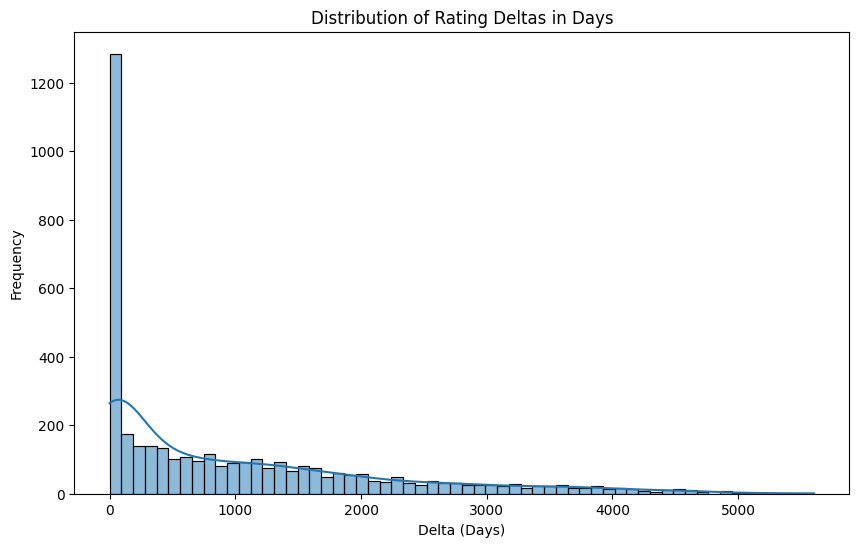

In [90]:
plt.figure(figsize=(10, 6))
sns.histplot(timedelta_distribution_by_user_df["delta_days"], bins=60, kde=True)
plt.xlabel('Delta (Days)')
plt.ylabel('Frequency')
plt.title('Distribution of Rating Deltas in Days')
plt.show()

In [91]:
timedelta_distribution_by_user_df["delta_days"].describe()

count    3930.000000
mean      990.639174
std      1165.435615
min         0.000220
25%        14.961264
50%       554.376024
75%      1559.280667
max      5604.342581
Name: delta_days, dtype: float64